# Exploratory data analysis

<a id='contents'></a>
## Contents

* [Introduction](#introduction)
* [Setup](#setup)
* [Data](#data)
* [Exploration](#exploration)
* [...](...)
* [References](#references)

<a id='introduction'></a>
## Introduction
↑↑ [Contents](#contents) ↓ [Setup](#setup)

From [[1, p. 7]](#H:2023):
>```tgbn-genre``` This is a bipartite and weighted interaction network between users and the music genres of songs they listen to. Both users and music genres are represented as nodes while an interaction specifies a user listens to a music genre at a given time. The edge weights denote the percentage of which a song belongs to a certain genre. The dataset is constructed by cross-referencing the songs in the [LastFM-song-listens dataset](http://snap.stanford.edu/jodie/#datasets) [15, 24] with that of music genres in the [million-song dataset](#http://millionsongdataset.com/) [2]. The LastFM-song-listens dataset has one month of who-listens-to-which-song information for 1000 users and the million-song dataset provides genre weights for all songs in the [LastFM-song-listens dataset](http://snap.stanford.edu/jodie/#datasets). We only retain genres with at least 10% weights for each song that are repeated at least a thousand times in the dataset. Genre names are cleaned to remove typos. Here, the task is to predict how frequently each user will interact with music genres over the next week. This is applicable to many music recommendation systems where providing personalized recommendation is important and user preference shifts over time.

> **References**

>[2] Bertin-Mahieux, T., D. P. Ellis, B. Whitman, and P. Lamere. '[The million song dataset](https://ismir2011.ismir.net/papers/OS6-1.pdf).' 2011.

>[15] Hidasi, B. and D. Tikk. '[Fast ALS-based tensor factorization for context-aware recommendation from implicit feedback](https://doi.org/10.1007/978-3-642-33486-3_5).' In: Flach, P.A., T. De Bie, and N. Cristianini (eds) Machine Learning and Knowledge Discovery in Databases. ECML PKDD 2012. Lecture Notes in Computer Science(), vol 7524. Springer, Berlin, Heidelberg. 

>[24] Kumar, S., X. Zhang, and J. Leskovec. '[Predicting dynamic embedding trajectory in temporal interaction networks](https://doi.org/10.1145/3292500.3330895).' In _Proceedings of the 25th ACM SIGKDD international conference on knowledge discovery & data mining_, pp. 1269–1278, 2019.


For clarification on the meaning of 'the percentage of which a song belongs to a certain genre', see [below](#edge_feature_elucidation). In general, the dataset will be elucidated in the [Exploration](#exploration) section.

<a id='setup'></a>
## Setup
↑↑ [Contents](#contents) ↑ [Introduction](#introduction) ↓ [Data](#data)

In [1]:
# SETUP

import os
from pathlib import Path
import sys

# If we're using Google Colab, we set the environment variable to point to the relevant folder in our Google Drive:
if 'COLAB_GPU' in os.environ:
    from google.colab import drive
    drive.mount('/content/drive')
    os.environ['TEMPORAL_GRAPHS'] = '/content/drive/MyDrive/Colab Notebooks/temporal_graphs'

# Otherwise, we use the environment variable on our local system:
project_environment_variable = "TEMPORAL_GRAPHS"

# Path to the root directory of the project:
project_path = Path(os.environ.get("TEMPORAL_GRAPHS"))

# Relative path to /scripts (from where custom modules will be imported):
scripts_path = project_path.joinpath("scripts")

# Add this path to sys.path so that Python will look there for modules:
sys.path.append(str(scripts_path))

# Now import path_step from our custom utils module to create a dictionary to all subdirectories in our root directory:
from utils import path_setup
path = path_setup.subfolders(base_path = project_path)

path['project'] : F:\projects\temporal-graphs
path['Resources'] : F:\projects\temporal-graphs\Resources
path['presentation'] : F:\projects\temporal-graphs\presentation
path['notebooks'] : F:\projects\temporal-graphs\notebooks
path['scripts'] : F:\projects\temporal-graphs\scripts
path['literature'] : F:\projects\temporal-graphs\literature
path['data'] : F:\projects\temporal-graphs\data


<a id='data'></a>
## Data
↑↑ [Contents](#contents) ↑ [Setup](#setup) ↓ [Exploration](#exploration)

See [above](#introduction) for a brief description of the ```tgbn-genre``` dataset, and how it was constructed. We'll load the dataset here and delve deeper into it [below](#exploration).

A ```csv``` file containing all records from the ```tgbn-genre``` dataset can be obtained by following these steps.
1. Install the TGB (Temporal Graph Benchmark) package using ```pip install py-tgb``` as per the [README.md in Shenyang Huang's TGB GitHub repo](https://github.com/shenyangHuang/TGB/blob/main/README.md) [[2]](#H_GH:2023). Note that this may uninstall pandas and re-install pandas version 1.5.3.
2. Execute the following code and select y when prompted with ```Will you download the dataset(s) now? (y/N)```. Note that this will download some ```.pkl``` files as well as ```csv``` files.
```
from tgb.nodeproppred.dataset import NodePropPredDataset
name = "tgbn-genre"
dataset = NodePropPredDataset(name=name, root=path['data'], preprocess=True)
data = dataset.full_data
```
4. Find the files created in Step 2 (output will include something like ```Dataset directory is  C:\Users\...\AppData\Local\Programs\Python\Python312\Lib\site-packages\tgb/datasets\tgbn_genre```.
5. Move the ```csv``` files to the directory given by ```path['data']```.
6. Delete any ```.pkl``` files that were created/downloaded as a result of Step 2, unless the source is trusted (they may pose a security risk).
7. Run the code cell below: it takes around 10 seconds to load ```tgbn-genre.csv``` (uses about 681.2 MB of memory), about 10 seconds to load ```tgbn-genre_edgelist.csv``` (545 MB of memory), and about 2 seconds to load ```tgbn-genre_node_labels.csv``` (84 MB memory).

In [141]:
import pandas as pd
import time

# Read the full dataset into a dataframe
tic = time.time()
tgbn_genre_df = pd.read_csv(path['data'].joinpath('tgbn-genre.csv'))
toc = time.time()
print(f'Time taken to load tgbn_genre_df: {toc - tic:.2f} seconds')

# Ancillary csv file
tgbn_genre_edgelist_df = pd.read_csv(path['data'].joinpath('tgbn-genre_edgelist.csv'))
tic = time.time()
print(f'Time taken to load tgbn_genre_edgelist_df: {tic - toc:.2f} seconds')

# Another ancillary csv file 
tgbn_genre_node_labels_df = pd.read_csv(path['data'].joinpath('tgbn-genre_node_labels.csv'))
toc = time.time()
print(f'Time taken to load tgbn_genre_node_labels_df: {toc - tic:.2f} seconds')

Time taken to load tgbn_genre_df: 9.60 seconds
Time taken to load tgbn_genre_edgelist_df: 10.09 seconds
Time taken to load tgbn_genre_node_labels_df: 1.63 seconds


<a id='exploration'></a>
## Exploration
↑↑ [Contents](#contents) ↑ [Data](#data) ↓ [...](#...)

Let's take a first look at ```tgbn_genre_df```.

In [143]:
df = tgbn_genre_df

display(df.head())
df.info()

,sources,destinations,timestamps,edge_idxs,edge_feat
0,513.0,0.0,1.108357e+09,1.0,0.375000
1,513.0,0.0,1.108357e+09,2.0,0.375000
2,514.0,1.0,1.108357e+09,3.0,0.452489
3,514.0,2.0,1.108357e+09,4.0,0.289593
4,514.0,3.0,1.108357e+09,5.0,0.257919


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17858395 entries, 0 to 17858394
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sources       float64
 1   destinations  float64
 2   timestamps    float64
 3   edge_idxs     float64
 4   edge_feat     float64
dtypes: float64(5)
memory usage: 681.2 MB


Before going further, we can convert the ```sources```, ```destinations```, and ```timestamps``` columns to integers and save memory. We'll just check first to make sure that all values in these three columns are indeed integers (this check only needs to be performed once). 

The ```edge_idxs``` column also contains only integers. In fact, it is simply the dataframe index translated by one. We verify this and drop the column, saving more memory. If we need it later, we can add it, as long as we don't transform the dataframe in such a way that the current rows no longer correspond to the current indices.

The resulting dataframe uses 340.6 MB of memory, literally half that of the original.

Lastly, we verify that the dataframe is sorted by ascending values in the ```timestamps``` column.

In [144]:
df = tgbn_genre_df

tic = time.time()

for col in ['sources', 'destinations', 'timestamps']:
    all_integers = df[col].apply(lambda x: x.is_integer()).all()
    if all_integers:
        print(f'All values in {col} column are integers.')
    else:
        print(f'Not all values in {col} column are integers. Convert with caution.')

for col in ['edge_idxs']:
    all_equal = (df[col] == df.index + 1).all()
    if all_equal:
        print(f'Every value in {col} is equal to its row index plus one.')
    else:
        print(f'Not every value in {col} is equal to its row index plus one. Check the data.')

toc = time.time()

print(f'Time taken: {toc - tic:.2f} seconds.')

All values in sources column are integers.
All values in destinations column are integers.
All values in timestamps column are integers.
Every value in edge_idxs is equal to its row index plus one.
Time taken: 13.36 seconds.


In [145]:
df = tgbn_genre_df

tic = time.time()

for col in ['sources', 'destinations','timestamps']:
    print(f'Converting dtype of {col} column to int.')
    df[col] = df[col].astype(int)

for col in ['edge_idxs']:
    print(f'Dropping {col} column.')
    df.drop(col, axis=1, inplace=True)
    
toc = time.time()

print(f'Time taken: {toc - tic:.2f} seconds.\n')

display(df.head())
display(df.tail())
df.info()

Converting dtype of sources column to int.
Converting dtype of destinations column to int.
Converting dtype of timestamps column to int.
Dropping edge_idxs column.
Time taken: 0.87 seconds.



,sources,destinations,timestamps,edge_feat
0,513,0,1108357203,0.375000
1,513,0,1108357203,0.375000
2,514,1,1108357264,0.452489
3,514,2,1108357264,0.289593
4,514,3,1108357264,0.257919


,sources,destinations,timestamps,edge_feat
17858390,1210,8,1245460981,0.216495
17858391,1210,75,1245461220,0.549451
17858392,1210,8,1245461220,0.450549
17858393,1210,75,1245461220,0.549451
17858394,1210,8,1245461220,0.450549


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17858395 entries, 0 to 17858394
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sources       int32  
 1   destinations  int32  
 2   timestamps    int32  
 3   edge_feat     float64
dtypes: float64(1), int32(3)
memory usage: 340.6 MB


In [151]:
df = tgbn_genre_df

df.sort_values(by='timestamps', inplace=True)

Now let's understand the data represented in the dataframe. As explained in [[1, §3]](#H:2023):
>Temporal graphs are often used to model networks that evolve over time, where nodes are entities and temporal edges are relations between entities through time. In this work, we focus on continuous time temporal graphs and denote them as timestamped edge streams consisting of triplets of source, destination, and timestamp; i.e., $\mathcal{G} = \{(s_0, d_0, t_0), (s_1, d_1, t_1),\ldots , (s_T , d_T , t_T )\}$ where the timestamps are ordered ($0 \le t_1 \le t_2 \le \ldots \le t_T$). Note that temporal graph edges can have different properties namely being weighted, directed, or attributed. We consider $\mathcal{G}$ as the augmented graph of all edges observed in the stream up to the time $t$ with nodes as $V_t$ and edges as $E_t$. Optionally, $\mathcal{G}_t$ can contain node features $X_t \in \mathbb{R}^{|V_t|\times k_n}$, where $k_n$ is the size of a node feature vector, and edge features $M_t \in \mathbb{R}^{|E_t|\times k_m}$, where $k_m$ is the size of an edge feature vector. We consider a fixed chronological split to form the training, validation, and test set.

In the context of the ```tgbn-genre``` dataset, sources $s$ correspond to users, destinations $d$ correspond to music genres, and timestamps $t$ are [Unix timestamps](https://www.unixtimestamp.com/), i.e. number of non-leap seconds since the start of the 'Unix epoch' (January 1, 1970, 00:00:00 UTC). Thus, the first row of our dataframe, in which $(s,d,t) = (513, 0, 1108357203)$, indicates that user 513 listened to a song belonging to genre 0, 1108357203 non-leap seconds after January 1, 1970 (midnight Coordinated Universal Time). (The genre turns out to be 'Rock Argentino', and the time was Monday February 14, 2005, at 05:00:03 GMT.) Similarly, the last row of our dataframe indicates that user 1210 listened to a song from genre 8 ('alternative') at Unix time 1245461220 (Saturday June 20, 2009, at 01:27:00 GMT).

Note that this means that our dataset spans a period of time equal to 1245461220 - 1108357203 = 137104017 seconds, or just under 1587 days (about four years, four months, and five days).

<a id='edge_feature_elucidation'></a>
<a> We also have a column ```edge_feat``` of edge features, consisting of values between 0.1 and 1. For the lower bound here, recall [[1, p. 7]](#H:2023):

> We only retain genres with at least 10% weights for each song that are repeated at least a thousand times in the dataset.

What exactly do these numbers represent? Essentially the following (we believe). Users can 'tag' songs they listen to. A song belongs to a genre g if it has been tagged with a g by some user. Thus, a typical song will belong to many genres, and each song has a genre distribution. That is, the number of times a song has been tagged with a g, divided by the number of times a song has been tagged, is the 'weight' of g associated with the song, and our edge feature. This is not a precise definition, but for present purposes, it suffices to understand that there is a weight associated with each record in our dataframe (each triple $(s,d,t)$), which is a measure of how strong a user $s$'s predilection for a given genre $d$ is, at time $t$.

# In progress. I'm working on the visualization below. Just getting started using graph plotting package. 

* Might choose a different package that allows interaction.
* Maybe can do an animated gif to show edges being added over time.
* Will select different subsets of the dataframe.
* Also, I'm still not confident about the definition of the edge features 

In [190]:
import numpy as np

df = tgbn_genre_df

sampled_values = df['timestamps'].sample(3, random_state=0)  

selected_rows = df[df['timestamps'].isin(sampled_values)]

In [192]:
selected_rows

,sources,destinations,timestamps,edge_feat
9115626,953,2,1195851062,0.617284
9115641,1194,276,1195851062,0.242424
9115640,1194,275,1195851062,0.757576
9115639,953,20,1195851062,0.382716
9115638,953,2,1195851062,0.617284
9115637,953,20,1195851062,0.382716
9115636,953,2,1195851062,0.617284
9115634,953,2,1195851062,0.617284
9115635,953,20,1195851062,0.382716
9115632,953,2,1195851062,0.617284


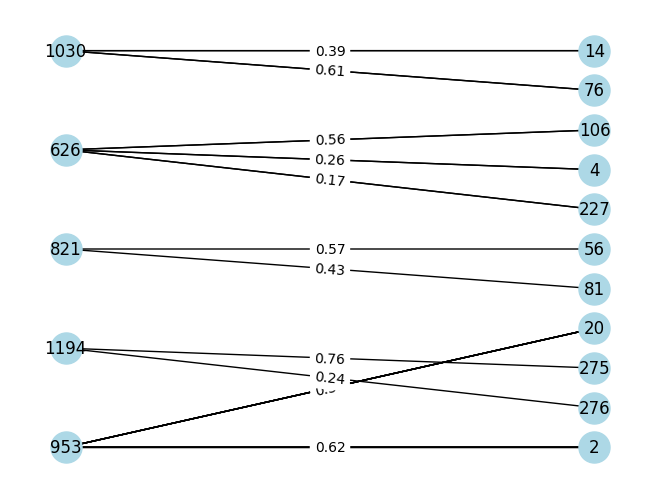

In [204]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a bipartite multigraph
B = nx.MultiGraph()

# Add nodes with the 'bipartite' attribute
B.add_nodes_from(selected_rows['sources'].values, bipartite=0)  # nodes in the first partition (e.g., users)
B.add_nodes_from(selected_rows['destinations'].values, bipartite=1)  # nodes in the second partition (e.g., movies)

# Add weighted edges between nodes in different partitions
for row in selected_rows.index:
    s = selected_rows.loc[row]['sources']
    d = selected_rows.loc[row]['destinations']
    w = selected_rows.loc[row]['edge_feat']
    round_w = round(w,2)
    B.add_edge(s, d, weight=round_w)


# Plot the bipartite multigraph
pos = nx.bipartite_layout(B, selected_rows['sources'].values)  # specify the first partition nodes for layout
nx.draw(B, pos, with_labels=True, node_color='lightblue', node_size=500)

# Add edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in B.edges(data=True)}
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)

# Display the plot
plt.show()


<a id='references'></a>
## References
↑↑ [Contents](#contents) ↑ [...](#...)

<a id='H:2023'></a>[1] Huang, S., et al. [Temporal graph benchmark for machine learning on temporal graphs.](https://doi.org/10.48550/arXiv.2307.01026) _Advances in Neural Information Processing Systems_, 2023. Preprint: [arXiv:2307.01026](https://doi.org/10.48550/arXiv.2307.01026), 2023.

<a id='H_GH:2023'></a>[2] Huang, S., et al. [TGB.](https://github.com/shenyangHuang/TGB) GitHub Repository. [https://github.com/shenyangHuang/TGB](https://github.com/shenyangHuang/TGB), 2023. Accessed May 14, 2024.

[3] Huang, S., et al. [Temporal Graph Benchmark.](https://tgb.complexdatalab.com/) [https://tgb.complexdatalab.com/](https://tgb.complexdatalab.com/), 2023. Accessed May 14, 2024.

[4] Huang, S., et al. [tgbn-genre dataset.](https://github.com/shenyangHuang/TGB/blob/main/tgb/datasets/dataset_scripts/tgbn-genre.py)
[https://github.com/shenyangHuang/TGB/blob/main/tgb/datasets/dataset_scripts/tgbn-genre.py](https://github.com/shenyangHuang/TGB/blob/main/tgb/datasets/dataset_scripts/tgbn-genre.py), 2023. Accessed May 14, 2024.